**Continuing to Part1 >>>>**

In [7]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *
from fastai2.medical.imaging import *

import pydicom
matplotlib.rcParams['image.cmap'] = 'bone'

pneumothorax_source = untar_data(URLs.SIIM_SMALL)
items = get_dicom_files(pneumothorax_source, recurse=True, folders='train')
img = items[10]
dimg = dcmread(img)

### Class TensorCTScan

Inherits from `PILBase`

### Class PILCTScan

Inherits from `PILBase`

#### Dataset.pct_in_window

Gets the % of pixels within a window `w`, `l`

For example using lungs as the `dicom_window` (1500,-600) we see that 80% of the pixels are within the window

In [5]:
dimg.pct_in_window(*dicom_windows.lungs)

0.7996940612792969

#### uniform_blur2d

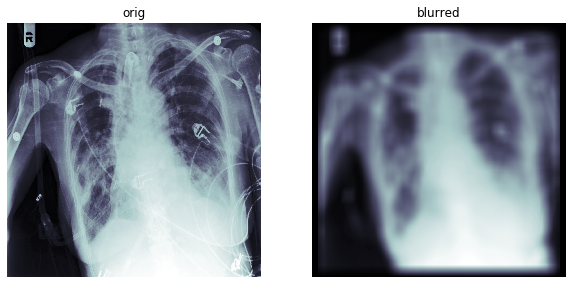

In [8]:
ims = dimg.hist_scaled(), uniform_blur2d(dimg.hist_scaled(),50)
show_images(ims, titles=('orig', 'blurred'), figsize=(10,10))

#### gauss_blur2d

Uses `gaussian_blur2d` kornia filter

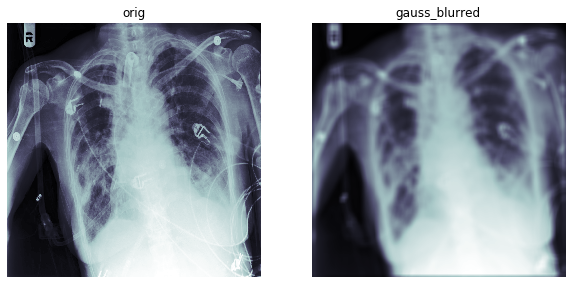

In [9]:
gims = dimg.hist_scaled(), gauss_blur2d(dimg.hist_scaled(),50)
show_images(gims, titles=('orig', 'gauss_blurred'), figsize=(10,10))

#### Dataset.mask_from_blur 

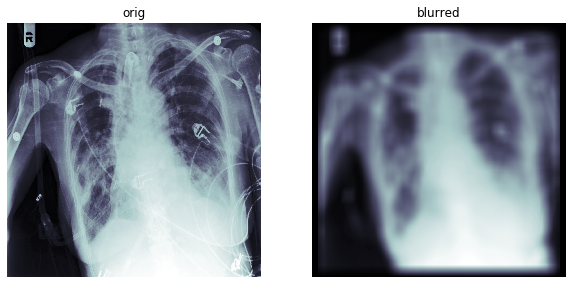

In [13]:
test = dimg.hist_scaled()
blur = uniform_blur2d(dimg.hist_scaled(),50)
ims = [test, blur]
show_images(ims, titles=('orig', 'blurred'), figsize=(10,10))

In [15]:
dicom_windows.brain

(80, 40)

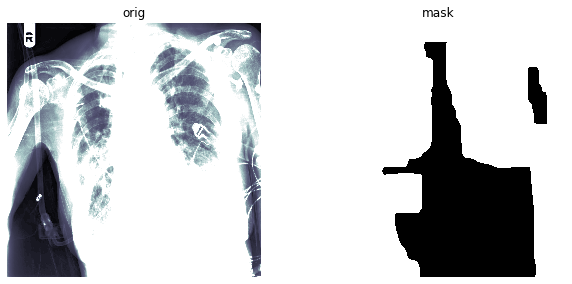

In [16]:
testblur = dimg.hist_scaled(min_px=0, max_px=100)
blur = uniform_blur2d(dimg.hist_scaled(),50)
test_mask = dimg.mask_from_blur(dicom_windows.brain, sigma=0.3, thresh=0.01, remove_max=True)
ims = [testblur,test_mask]
show_images(ims, titles=('orig', 'mask'), figsize=(10,10))

All values above +80 will be white and all values below 0 are black.

#### mask2bbox

In [17]:
#Todo

In [21]:
bbs = mask2bbox(test_mask)
lo,hi = bbs
print(bbs)
print(lo[0], hi)

tensor([[   0,    0],
        [1023, 1023]], device='cuda:0')
tensor(0, device='cuda:0') tensor([1023, 1023], device='cuda:0')


#### crop_resize

In [22]:
#Todo

In [23]:
def _bbs2sizes(crops, init_sz, use_square=True):
    bb = crops.flip(1)
    print(f'bb" {bb} shape: {bb.shape}')
    szs = (bb[1]-bb[0])
    print(f'first szs: {szs} shape: {szs.shape}')
    if use_square: szs = szs.max(0)[0][None].repeat((2,1))
    overs = (szs+bb[0])>init_sz
    print(f'overs: {overs}')
    bb[0][overs] = init_sz-szs[overs]
    lows = (bb[0]/float(init_sz))
    return lows,szs/float(init_sz)

In [24]:
def crop_resize(x, crops, new_sz):
    # NB assumes square inputs. Not tested for non-square anythings!
    bs = x.shape[0] #number of channels
    print(bs)
    lows,szs = _bbs2sizes(crops, x.shape[-1])
    print(f'lows: {lows}\n szs:{szs}')
    if not isinstance(new_sz,(list,tuple)): new_sz = (new_sz,new_sz)
    id_mat = tensor([[1.,0,0],[0,1,0]])[None].repeat((bs,1,1)).to(x.device)
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=UserWarning)
        sp = F.affine_grid(id_mat, (bs,1,*new_sz))+1.
        grid = sp*unsqueeze(szs.t(),1,n=2)+unsqueeze(lows.t()*2.,1,n=2)
        return F.grid_sample(x.unsqueeze(1), grid-1)

#### Dataset.to_nchan

In [26]:
#Todo

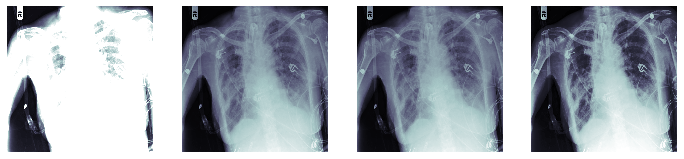

In [27]:
show_images(dimg.to_nchan([dicom_windows.brain,dicom_windows.subdural,dicom_windows.abdomen_soft]))

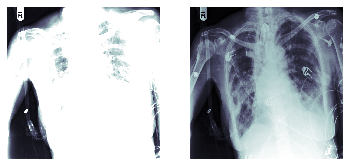

In [28]:
show_images(dimg.to_nchan([dicom_windows.brain]))

#### Dataset.to_3chan 

In [29]:
#Todo

#### Tensor.save_jpg

Save a `tensor` into a .jpg with specified windows

In [31]:
tensor_dicom = pixels(dimg)
tensor_dicom.save_jpg(path=(pneumothorax_source/f'train/01tensor.jpg'), wins=[dicom_windows.lungs, dicom_windows.subdural])

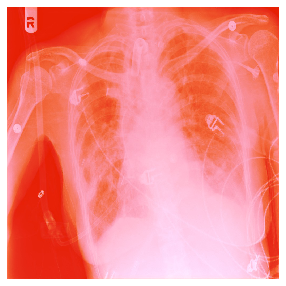

In [32]:
show_image(Image.open(pneumothorax_source/f'train/01tensor.jpg'))

#### Dataset.save_jpg

Save a DICOM image into a .jpg

In [33]:
dimg.save_jpg(path=(pneumothorax_source/f'train/01dicom.jpg'), wins=[dicom_windows.lungs, dicom_windows.lungs])

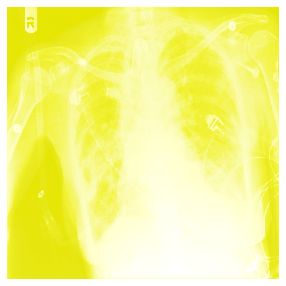

In [34]:
show_image(Image.open(pneumothorax_source/f'train/01dicom.jpg'))

#### Dataset.set_pixels

In [35]:
#Todo

#### Dataset.zoom

Zoom's image by specifying pixel ratio

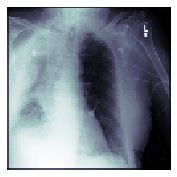

In [36]:
dimg2 = dcmread(items[11])
dimg2.zoom(0.1)
dimg2.show()

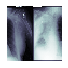

In [37]:
dimg2.zoom(0.5)
dimg2.show()

#### Dataset.zoom_to

((1024, 1024), None)

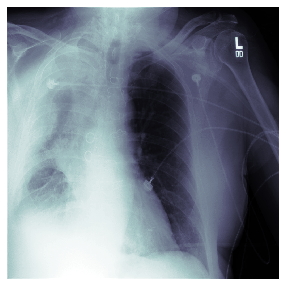

In [38]:
dimg2 = dcmread(items[11])
dimg2.shape, dimg2.show()

((90, 90), None)

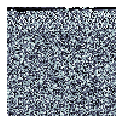

In [39]:
dimg2.zoom_to(90)
dimg2.shape, dimg2.show()